In [27]:
import os
import pandas as pd

SEED = 42
def load_data():
    data = pd.read_csv("../dataset/heart_cleveland_upload.csv")
    return data

data = load_data()

## Data Exploration

In [2]:
print(f"data shape: {data.shape}")
print(f"Feature names: {data.columns}")
print(f"Label distribution:\n{data['condition'].value_counts()}")
print(data.describe())

data shape: (297, 14)
Feature names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')
Label distribution:
0    160
1    137
Name: condition, dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

   

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

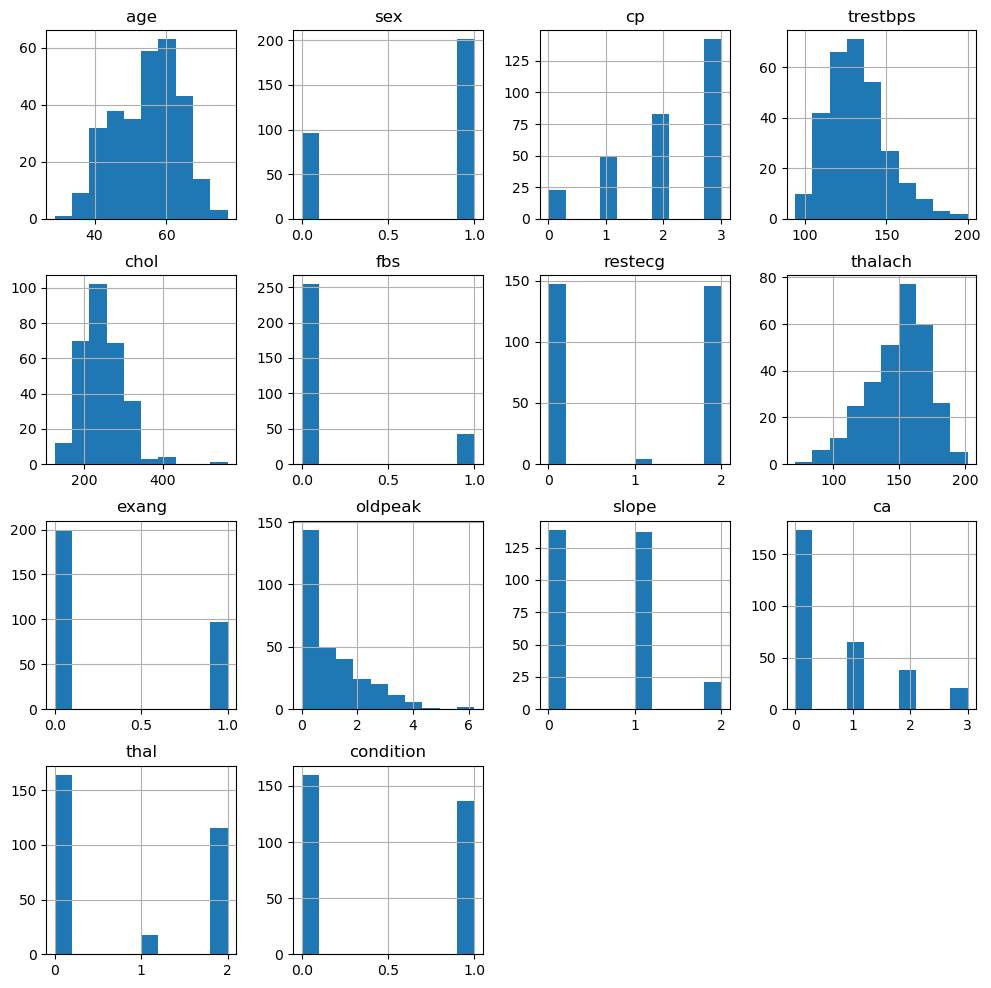

In [3]:
data.hist(figsize = (12, 12))

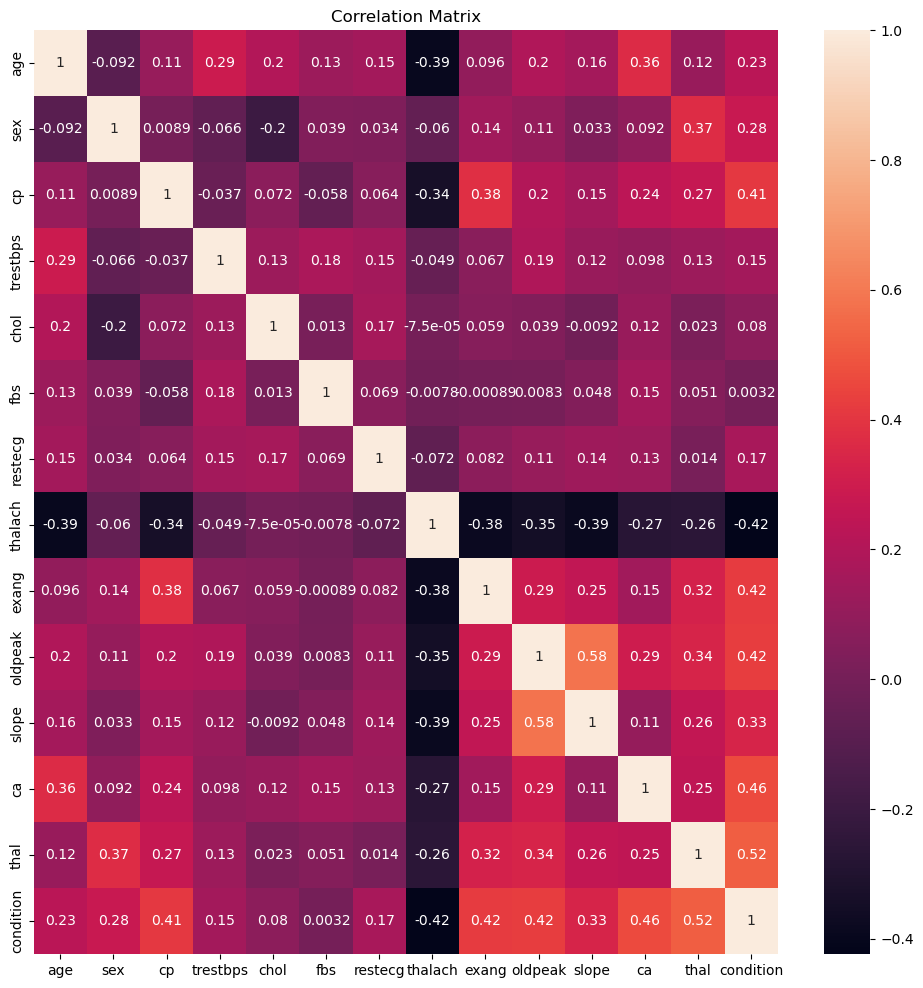

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_feature=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data[corr_feature.index].corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing

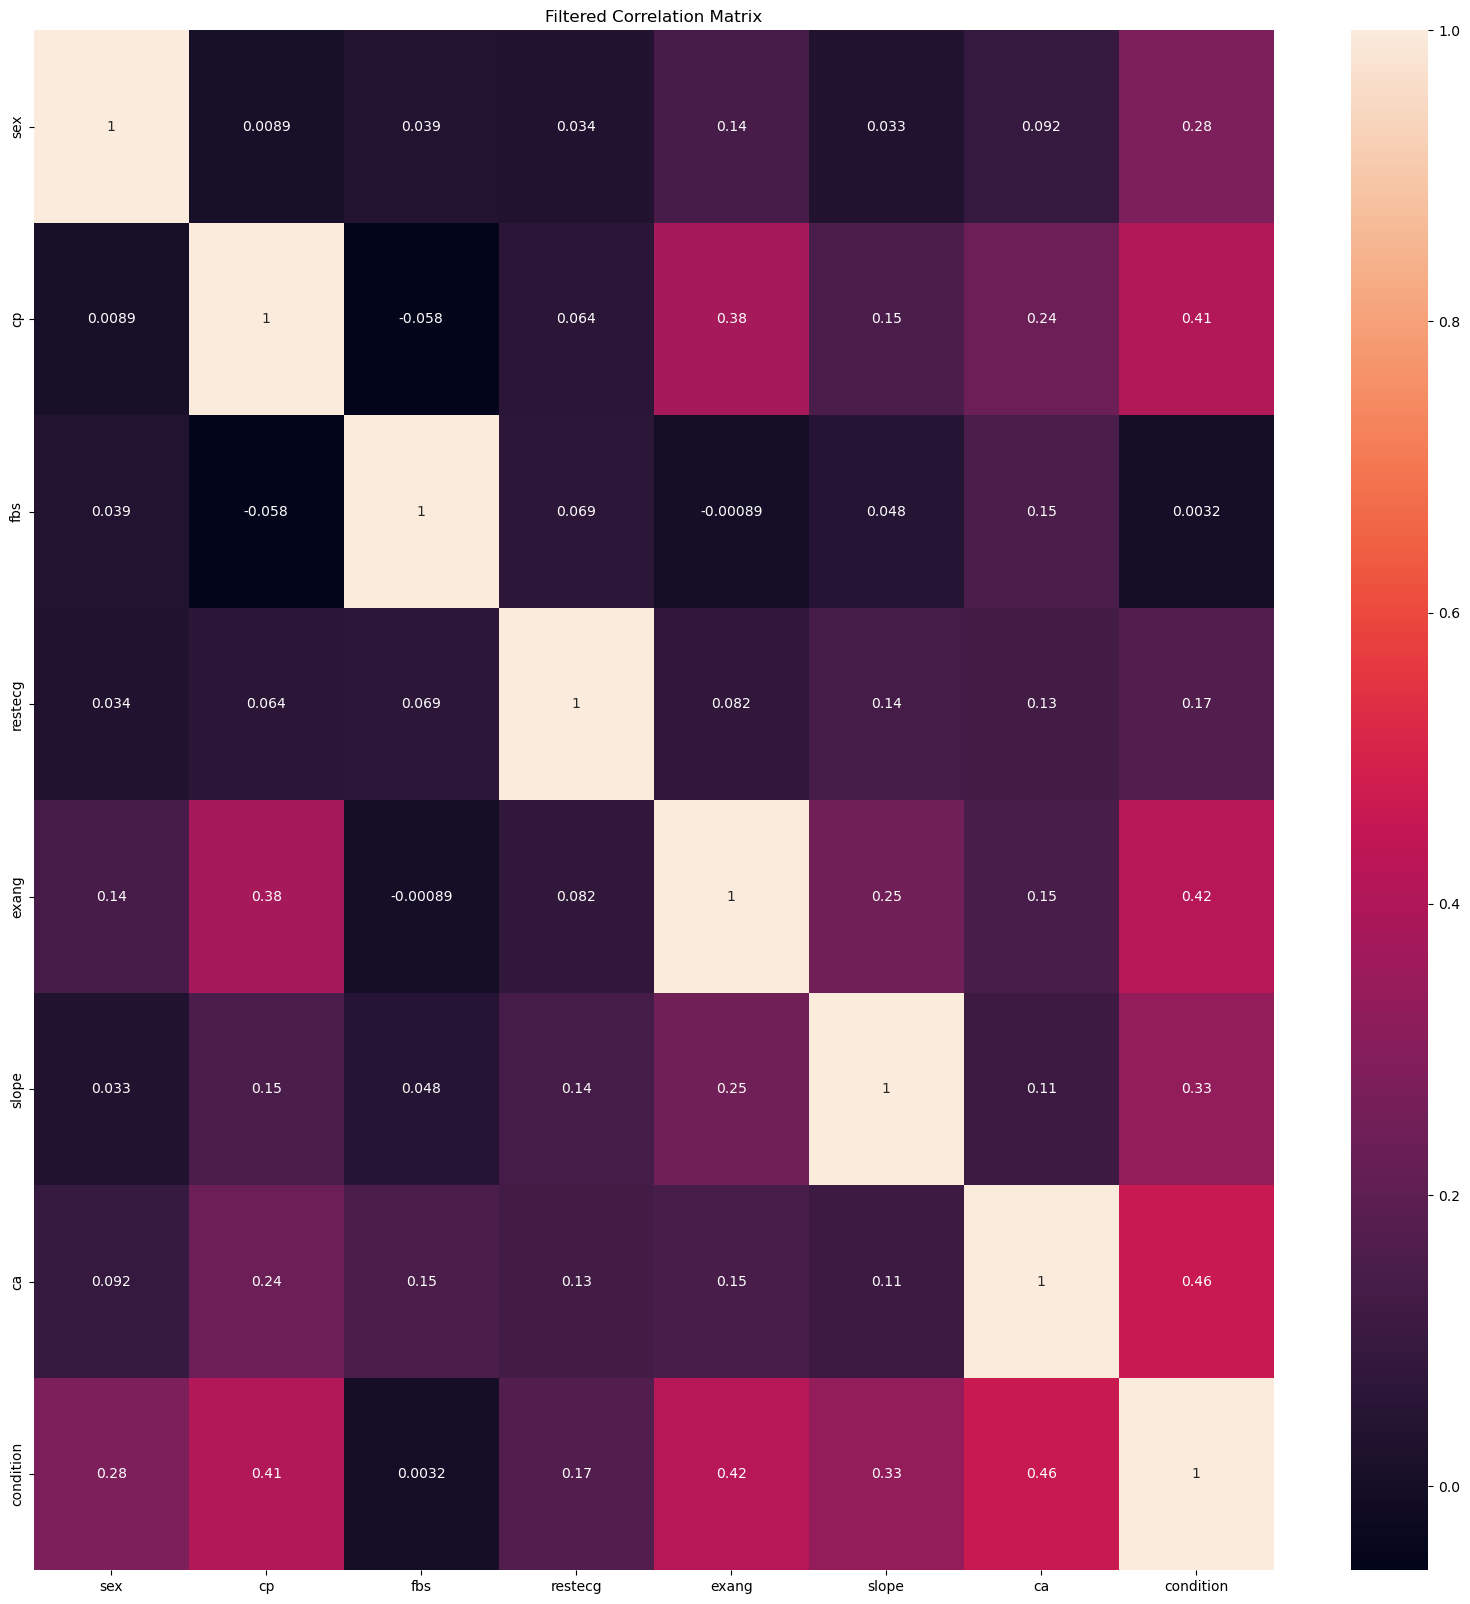

In [29]:
# Dropping highly correlated important features
data = load_data()
data.drop(columns=['thalach', 'chol', 'age', 'oldpeak', 'trestbps', 'thal'], inplace=True)

corr_feature=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data[corr_feature.index].corr(),annot=True)
plt.title("Filtered Correlation Matrix")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

labels = data['condition']
feats = data.drop(['condition'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(feats, labels, test_size = 0.2, random_state = SEED)

## Training models

### LightGBM default settings

TRAIN RESULTS:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       128
           1       0.90      0.83      0.86       109

    accuracy                           0.88       237
   macro avg       0.88      0.87      0.88       237
weighted avg       0.88      0.88      0.88       237

TEST RESULTS:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

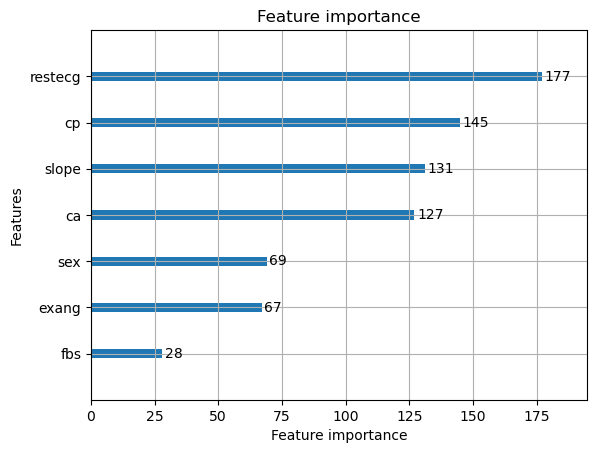

In [37]:
import lightgbm as lgb
from sklearn.metrics import classification_report

vanilla_clf = lgb.LGBMClassifier()
vanilla_clf.fit(X_train, y_train)
y_pred_train=vanilla_clf.predict(X_train)
y_pred_test=vanilla_clf.predict(X_test)

print(f"TRAIN RESULTS:\n{classification_report(y_train, y_pred_train)}")
print(f"TEST RESULTS:\n{classification_report(y_test, y_pred_test)}")
lgb.plot_importance(vanilla_clf)

### Tuning LightGBM hyperparameters

TRAIN RESULTS:
              precision    recall  f1-score   support

           0       0.84      0.88      0.85       128
           1       0.84      0.80      0.82       109

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237

TEST RESULTS:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

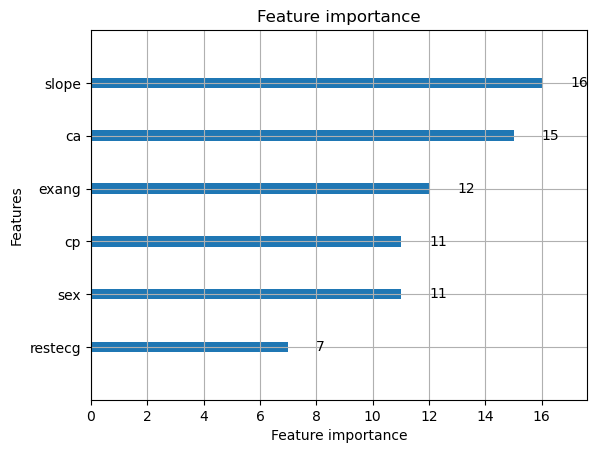

In [38]:
import lightgbm as lgb
from sklearn.metrics import classification_report

clf = lgb.LGBMClassifier(num_leaves=15, max_depth=5, n_estimators=10)
clf.fit(X_train, y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

print(f"TRAIN RESULTS:\n{classification_report(y_train, y_pred_train)}")
print(f"TEST RESULTS:\n{classification_report(y_test, y_pred_test)}")
lgb.plot_importance(clf)